# SCS 3546 Week 6 - Natural Language Processing

## Introduction

- Develop some familiarity with several of the key concepts in NLP
- Understanding Regular Expressions and their applications
- Have a look at some of the features of the Natural Language Toolkit (NLTK)

## What is Natural Language Processing?

- Natural Language Processing (NLP) is the study of computational treatment of natural (human) language

- NLP applications include:
  - Search: Web, documents, autocomplete
  - Editing: Spelling, grammar, style
  - Dialog: Chatbots, assistants
  - Writing: Index, concordance, table of contents
  - Email: Spam filter, classification, prioritization
  - Text mining: Summarization, knowledge extraction, medical diagnosis
  - Law: Legal inference, precedent search, subpoena classification
  - News: Event detection, fact checking, headline composition
  - Attribution: Plagiarism detection, literary forensics, style coaching
  - Sentiment analysis: Community morale monitoring, product review triage, customer care
  - Behavior prediction: Finance, election forecasting, marketing
  - Creative writing: Movie scripts, poetry, song lyrics
  
Source: Natural Language Processing in Action

## Ambiguity in Natural Language

Ambiguity in language is one of the main issues in interpreting the concepts they represent. Consider the following sentences:

- "Teachers Strikes Idle Kids."
- "Stolen Painting Found by Tree."
- "Local High School Dropouts Cut in Half."
- “Eats shoots and leaves.”

Grammar is a description, not a prescription

## Other Issues
- Synonyms
- Homonyms
- Overloading
- Misspellings
- Sarcasm
- Allegory
- Dialects

## NLP Pipelines

Natural Language processing is usually organized into a pipeline of operations that parse and analyze the text, then generate a response of some kind.
The figure below shows an example of a Chatbot pipeline:
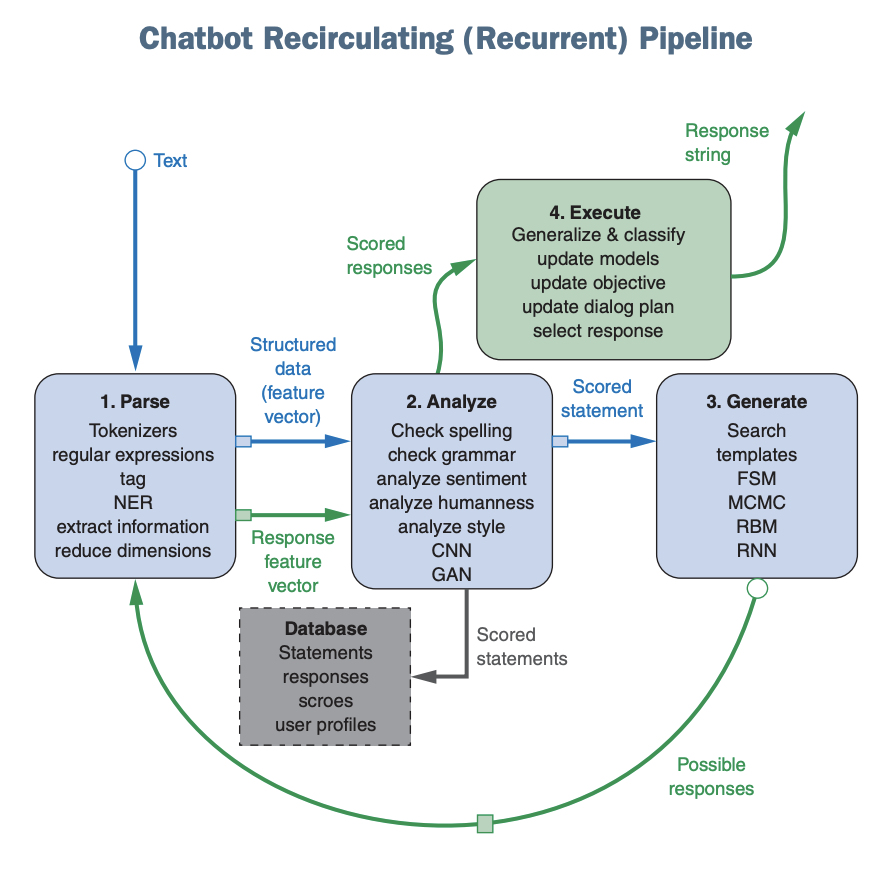
Source: Natural Language Processing in Action by Lane, Howard & Hapke

## Tokenization

### Concept
- Split on white space (in most languages)
    - Regular expressions and finite state automata are often used
    - Special cases: Names (particularly multi-word), initials, hyphenated words, abbreviations, special forms (dates, phone numbers, URLs, etc.)

### Terminology
  - Type: An element of a vocabulary (also known as a lexicon)
  - Token: An instance of a type
  - Tokenizer: A sofware filter that converts a text string into a set of tokens (aka lexer, scanner, lexical analyzer)
  
### Popular Python tokenizers:
  - NLTK
  - SpaCy
  - CoreNLP

### Issues in Tokenization

Consider: “There’s a moon in the sky.  It’s called The Moon." (B52's)

- Punctuation
- Contractions: is "isn’t" one word or two (many tokenizers treat as two)
- Named Entities
- Rare words
- Stop words

- Other languages
  - German: Compounds words such as schadenfreude
  - Chinese: average of about 2 symbol/word; greedy readings work quite well but there are better algos
  - Japanese: kanji, hirigana, katakana, romanji

## Normalization
### Concept
- The concept is to replace similar words with a single token
- Reduces word vector size and therefore processing cost and likelihood of overfitting
- Essentially dimensionality reduction


### Normalization Techniques
- Case folding: Force all lower case 
  - Can make named entity resolution more difficult
  - Becoming less common as a result
- Stemming: Crude chopping of affixes
  - e.g. remove -s or -ing at end
  - Can cut vocabulary size in half (or more if aggressive)
  - Many algoritms: Porter’s is most common English stemmer and has a lot of knowledge of English hardcoded in it
  - Useful for search where we are looking for similar, not exact matches (will improve recall but reduce precision)
- Lemmatization: Extraction of the base form
  - e.g. “are”, “am”, “is” replaced with “be”
  - Better for most applications than stemmers which might take “better” and convert it to “bet”
- Hashtag expansions

### When to Use Stemming vs. Lemmatization
- If you want the recall benefit of stemming try putting a lemmatizer before the stemmer
- NLTK lemmatizer uses the Princeton WordNet graph of word meanings
- Newer packages like SpaCy don’t provide a stemmer, only. a lemmatizer
- Stemmers and lemmatizers (like stop words) are being less used all the time as computers become more powerful

##  Regular Expressions

- Helps you find and match the patterns in text
    - Finding all the email addresses in webpage
    - Email addresses are strings that has exactly one @ sign, and at least one . in the part after the @
    - Based on the above description (which is too general but mostly enough for basic check) the regular expression for an email address is as follows
    - Email pattern: **[^@]+@[^@]+\.[^@]+**
    - The above pattern means some at least one character which is not @ ([^@]+), followed by an @ sign, followed by at least one character which is not @ ([^@]+), followed by a single . , and again followed by at least one character which is not @ ([^@]+)
    - A more comprehensive pattern that does not allow spaces inside email adresses is as follows:
    - Email pattern: **[^@|\s]+@[^@]+\.[^@|\s]+**
    
- Some Regular expression syntax examples 
    - **.**	Matches any character
    - **^abc**	Matches some pattern abc at start of a string
    - **abc$**	Matches some pattern abc at the end of a string
    - **[abc]**	Matches one of a set of characters
    - **[A-Z0-9]**	Matches one of a range of character
    - **ed|ing|s**	Matches one of the specified strings
    - **\***	Matches zero or more of the previous item
    - **\+**	Matches one or more of the previous item

###  Regular Expressions in Python

- Take a crash course to learn the most commonly used syntax for writing the patterns
    - [Regex tutorial — A quick cheatsheet by examples](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285)
    - [Python Regex Cheatsheet](https://www.debuggex.com/cheatsheet/regex/python)
    - In Python **re** library can be used. It has many methods and the following methos are more common
        - re.match()
        - re.search()
    - The match() function only checks if the RE matches at the beginning of the string while search() will scan forward through the string for a match. It’s important to keep this distinction in mind. Remember, match() will only report a successful match which will start at 0; if the match wouldn’t start at zero, match() will not report it.

In [ ]:
# Let's see how we can make use of re library to extract part of text
import re
print(re.match('super', 'superstition').span())
print(re.match('super', 'insuperable'))
print(re.search('super', 'superstition').span())
print(re.search('super', 'insuperable').span())

### Finding email addresses in a text document using Regular Expressions

The following code shows how we can use **re** library to extract all the **valid** email addresses from a source docuements.

In [ ]:
#Finding email addresses in a text file
import re
string="Hello friend, You can send me an email either to example@me.com or to me@example.com or me[at]gmail[dot]com"
# findall returns all non-overlapping matches of pattern in string, as a list of strings. 
res = re.findall("[^@|\s]+@[^@]+\.[^@|\s]+",string) 
res

## n-Grams
- The Distributional Hypothesis (1950’s): There is a link between how words are distributed and what they mean
- Sapir-Whorf Hypothesis: The structure of a language determines a native speaker's perception and categorization of experience
- Collocations: Words that go together to express a concept
- Concordances: An alpabetical index that shows words in their context
- n-grams are sequences of words found in natural language text
- Useful for translation, spelling correction, speech recognition, question answering
- Consider the meaning of “not old” vs. not and old individually: perhaps we should add “not old” to our vocabulary if it occurs
- We can add 2, 3, etc.-grams
- Can have letter n-grams as well (e.g. used internally in DBMS’s for wildcard lookups) but for our purposes we are only concerned with word n-grams
- No point in trying to generate all possible n-grams in advance (combinatorial explosion) so we are only interested in the ones that actually occur in our corpus
- Consider very rare collocations: Can’t determine their frequency of occurrence so not useful for classification problems
- Consider very common collocations (e.g. “is a”): Carry almost no information (but useful for language detection)
- A vocabulary of about 20,000 words is sufficient to track 95% of words in a corpus of tweets, blog posts and news article

## Language Models
- What is the probability of the next word given what we’ve seen so far?
- Can’t just count instances: too many sentences; never have enough data
- So we use a simplifying assumption: The Markov property (only the previous few words matter)


## Representing Words and Documents
### Pre-Deep Learning Approaches
- Bag of Words
- Bags of n-Grams
- TF-IDF vectors

### Bag of Words or n-Grams
- We would like to model words, n-grams and documents in a way that is amenable to computer processing
- First attempt
  - One Hot encoding for words and n-grams
  - Bag of Words (BOW) encoding for documents: sum or logical-OR of word vectors
- Advantages:
  - Numeric representation
  - Simple to compute
  - Easy to interpret and use
  - Can compare two documents by comparing their BOW encodings
- Disadvantages:
  - Loses context and therefore meaning
  - Hugely wasteful of memory space


### Topic Modeling with TF-IDF
- Let's say we want to divide up a corpus (collection) of documents into similar clusters
- How should we decide how similar two documents are?
  - How many words they have in common
  - How specialized those words are
- To capture these two aspects we need two measures for each word in our vocabulary:
  - Term Frequency: How frequently the word occurs in each document
  - Document Frequency: How often the word occurs in our corpus
- We can combine these measures as Term Frequency / Document Frequency (called TF-IDF for Term Frequency, Inverse Document Frequency)
- the Document Frequency is usually measured on a log scale

### Cosine Similarity
- We can measure the similarity of vectors (such as TF-IDF vectors) using Cosine Similarity
- The more similar the vectors are, the smaller the angle there should be between them
- The cosine similarity of two vectors, x and y, is easily calculated using dot product 

\begin{align}
cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||}
\end{align}
- Cosine similarity is a number that runs between 0 (nothing in common) to 1 (identical) for TF-IDF vectors (Note: Here identical means identical TF-IDF, not necessarily identical documents)

# The Natural Language Toolkit: NLTK

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

- Originally developed in 2001 at the University of Pennsylvania
- Version 3.3 released in 2018
- Natural Language Processing with Python book: https://www.nltk.org/book/  


## Hands-On NLTK

- Go to https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/tree/master/notebooks
- Download and experiment with the code for Chapters 5 & 6 (and/or others)

## Resources
- https://www.nltk.org/
- https://en.wikipedia.org/wiki/Regular_expression
- Lane, Howard & Hapke. Natural Language Processing in Action. Manning. 2019.
- Jurafsky & Martin. Speech and Language Processing, 3rd Ed. https://web.stanford.edu/~jurafsky/slp3/
- SpaCy: https://spacy.io/
- gensim: https://radimrehurek.com/gensim/